In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(X_train, Y_train),(X_test,Y_test) = mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


In [5]:
X_train.shape

(60000, 28, 28)

Text(0.5, 1.0, 'o numero é: 5')

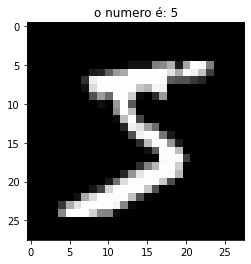

In [9]:
single_image = X_train[0]
plt.imshow(single_image,cmap='gray')
plt.title('o numero é: '+str(Y_train[0]))

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
Y_cat_train = to_categorical(Y_train,10)
Y_cat_test = to_categorical(Y_test,10)

In [12]:
X_train = X_train/255
X_test = X_test/255

In [13]:
# batch_size width height channels
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [14]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [16]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))

model.add(Dense(10,activation='softmax'))#multi class problem

model.compile(loss='categorical_crossentropy', optimizer = 'adam',metrics=['accuracy'])


In [18]:
from tensorflow.keras.callbacks import EarlyStopping 

In [20]:
early_stop=EarlyStopping(monitor='val_loss', patience=1)

In [21]:
model.fit(X_train,Y_cat_train,epochs=10,validation_data=(X_test,Y_cat_test),
         callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 45s 747us/sample - loss: 0.1385 - acc: 0.9588 - val_loss: 0.0565 - val_acc: 0.9818
Epoch 2/10
60000/60000 [==============================] - 42s 694us/sample - loss: 0.0476 - acc: 0.9858 - val_loss: 0.0551 - val_acc: 0.9820
Epoch 3/10
60000/60000 [==============================] - 39s 643us/sample - loss: 0.0317 - acc: 0.9902 - val_loss: 0.0405 - val_acc: 0.9873
Epoch 4/10
60000/60000 [==============================] - 38s 632us/sample - loss: 0.0202 - acc: 0.9939 - val_loss: 0.0379 - val_acc: 0.9882
Epoch 5/10
60000/60000 [==============================] - 38s 634us/sample - loss: 0.0150 - acc: 0.9952 - val_loss: 0.0536 - val_acc: 0.9844


In [22]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,acc,val_loss,val_acc
0,0.138499,0.958767,0.056540,0.9818
1,0.047596,0.985783,0.055099,0.9820
2,0.031697,0.990200,0.040529,0.9873
3,0.020183,0.993867,0.037940,0.9882
4,0.015028,0.995150,0.053646,0.9844


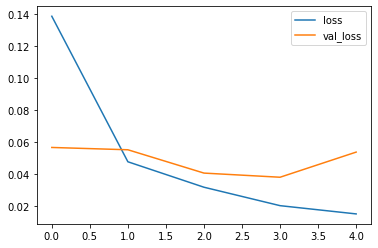

In [24]:
metrics[['loss','val_loss']].plot()

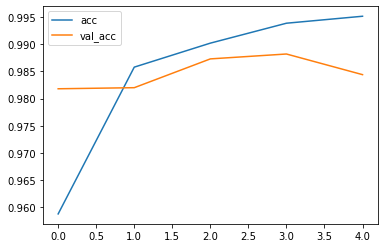

In [28]:
metrics[['acc','val_acc']].plot()

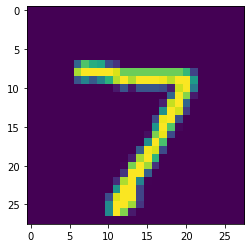

In [31]:
my_number = X_test[0]
plt.imshow(my_number.reshape(28,28))

In [32]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)